# Rozkład dwumianowy
Gdy zmienna losowa $X$ ma rozkład dwumianowy z parametrami $p$ i $n$, zapisujemy go jako $X \thicksim B(n,p)$, a gęstość wyrażona jest wzorem:
$$
P(X = k) = {n \choose k} p^k (1-p)^{n-k},
$$
gdzie
$
{n \choose k} = \frac{n!}{k!(n-k)!}.
$

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

Definiujemy zmienną losową

In [2]:
p = 0.5
num = 4

In [3]:
binom_dist = stats.binom(num, p)

In [7]:
binom_dist.pmf(np.arange(7))

array([0.0625, 0.25  , 0.375 , 0.25  , 0.0625, 0.    , 0.    ])

Możemy wylosować próbkę i narysować histogram

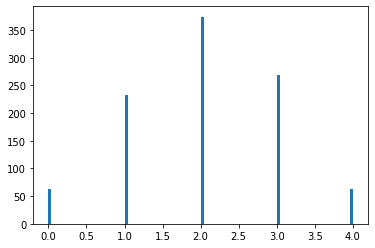

In [12]:
trails = binom_dist.rvs(1000)
plt.hist(trails, bins=100)
plt.show()

Możemy policzyć momenty

In [15]:
p = 0.5
num = 4
mean, var, skew, kurt = stats.binom.stats(num, p, moments='mvsk')
print(mean)
print(var)
print(skew)
print(kurt)

2.0
1.0
0.0
-0.5


Narysujmy gętość zmiennej losowej

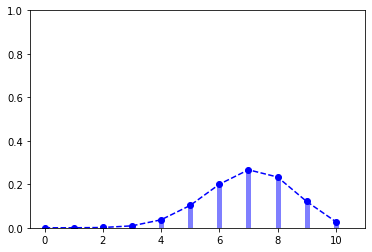

In [41]:
p = 0.7
num = 10
fig, ax = plt.subplots(1,1)
x = np.arange(0, num + 1)
ax.set_xlim([-0.5, num + 1])
ax.set_ylim([0,1])
ax.plot(x, stats.binom.pmf(x, num, p), 'bo--')
ax.vlines(x, 0, stats.binom.pmf(x, num, p), colors='b', lw=5, alpha=0.5)
plt.show()

Narysujmy dystrybuantę zmiennej losowej

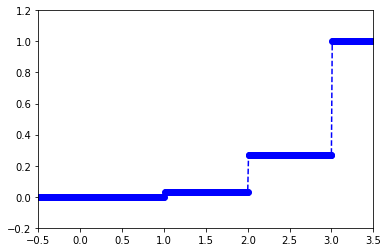

In [39]:
p = 0.9
num = 3
fig, ax = plt.subplots(1,1)
x = np.arange(-5, num+1 , 0.01)
ax.set_xlim([-0.5, num+0.5])
ax.set_ylim([-0.2,1.2])
ax.plot(x, stats.binom.cdf(x, num,p), 'bo--')
plt.show()

In [30]:
stats.binom.cdf(np.arange(-5, num + 1, 0.01), num, p)

array([0., 0., 0., ..., 1., 1., 1.])

Narysujmy gętość zmiennej losowej dla różnych prametrów

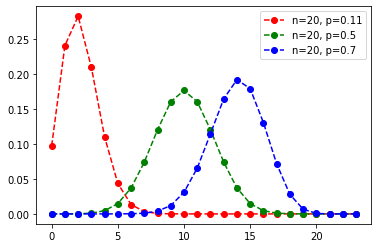

In [47]:
fig, ax = plt.subplots(1, 1)

x = np.arange(0, 24)
ax.plot(x, stats.binom.pmf(x, 20, 0.11), 'bo--', label='n=20, p=0.11', color='r')
ax.plot(x, stats.binom.pmf(x, 20, 0.5), 'bo--', label='n=20, p=0.5', color='g')
ax.plot(x, stats.binom.pmf(x, 20, 0.7), 'bo--', label='n=20, p=0.7', color='b')
ax.legend()
plt.show()

In [53]:
fig, ax = plt.subplots(1, 1)

x = np.arange(0, 40)
ax.plot(x, stats.binom.pmf(x, 20, 0.5), 'bo--', label='n=20, p=0.5', color='r')
ax.plot(x, stats.binom.pmf(x, 30, 0.5), 'bo--', label='n=30, p=0.5', color='g')
ax.plot(x, stats.binom.pmf(x, 40, 0.5), 'bo--', label='n=40, p=0.5', color='b')
ax.plot(x, stats.binom.pmf(x, 50, 0.5), 'bo--', label='n=50, p=0.5', color='y')
ax.legend()
plt.show()

ValueError: Invalid RGBA argument: 1

<Figure size 432x288 with 1 Axes>

In [52]:
list(range(20, 50, 5))

[20, 25, 30, 35, 40, 45]

In [64]:
from matplotlib.pyplot import cm
color=cm.rainbow(4)

In [65]:
color

(0.46862745098039216, 0.04925994109281685, 0.9996964519778716, 1.0)

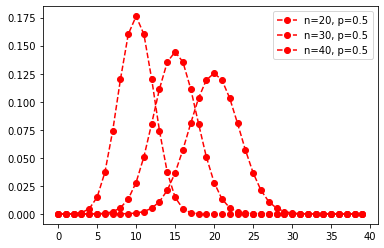

In [56]:
fig, ax = plt.subplots(1, 1)

x = np.arange(0, 40)
for num in range(20, 50, 10):
    
    ax.plot(x, stats.binom.pmf(x, num, 0.5), 'bo--', label=f'n={num}, p=0.5', color='r')

ax.legend()
plt.show()

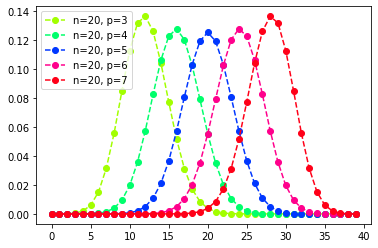

In [66]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
#https://exceptionshub.com/how-to-generate-random-colors-in-matplotlib.html
fig, ax = plt.subplots(1,1)
x=np.arange(0,40)
cmap=get_cmap(40)

for p in np.arange(3,8):
    ax.plot(x,stats.binom.pmf(x,40,p/10),'bo--', label=f'n=20, p={p}', color=cmap(p**2))
ax.legend()